In [1]:
from utilities import compareImages, resize
import cv2 as cv


In [10]:
img = cv.imread("images/receipt_2.jpg", cv.IMREAD_GRAYSCALE)

original = img.copy()
img = resize(img, 500 / img.shape[0])

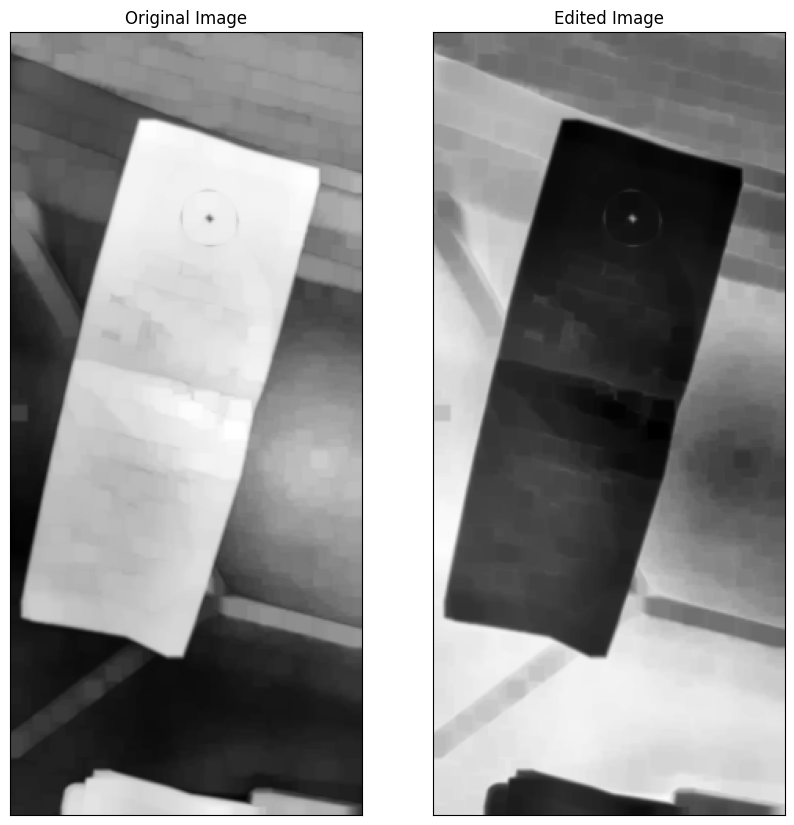

In [11]:
blurred = cv.GaussianBlur(img, (5, 5), 1)
dilate_kernel = cv.getStructuringElement(cv.MORPH_RECT, (9, 9))
dilated = cv.dilate(blurred, dilate_kernel)
compareImages(dilated, 255-dilated)

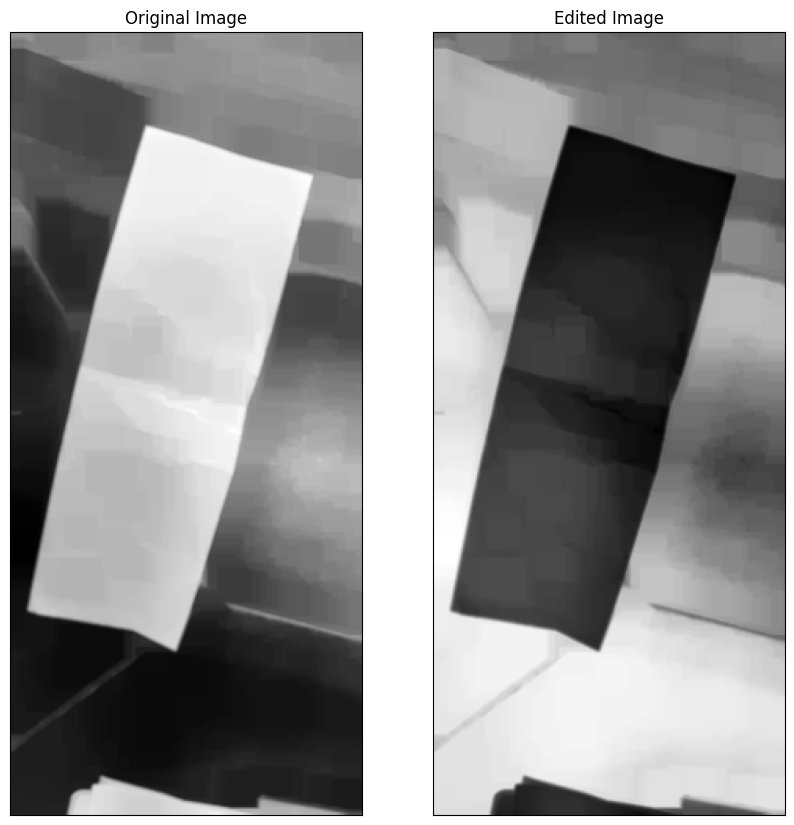

In [18]:
import numpy as np

morph_kernel = np.ones((5,5),np.uint8)
morphed = cv.morphologyEx(blurred, cv.MORPH_CLOSE, morph_kernel, iterations=4)
compareImages(morphed, 255 - morphed)

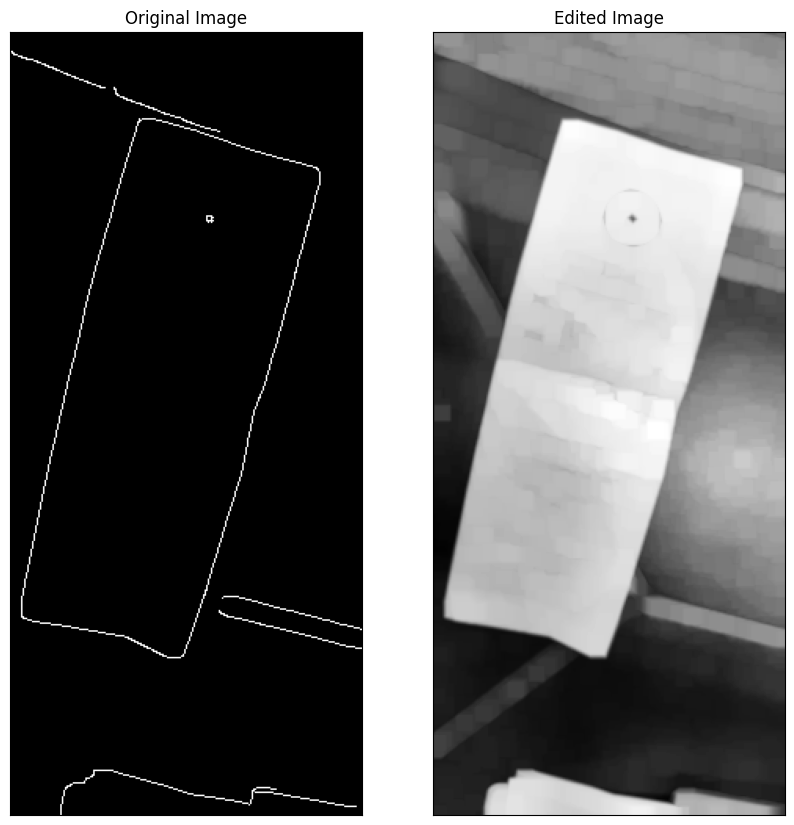

In [34]:

canny = cv.Canny(dilated, 100, 200, apertureSize=3)
compareImages(canny, dilated)


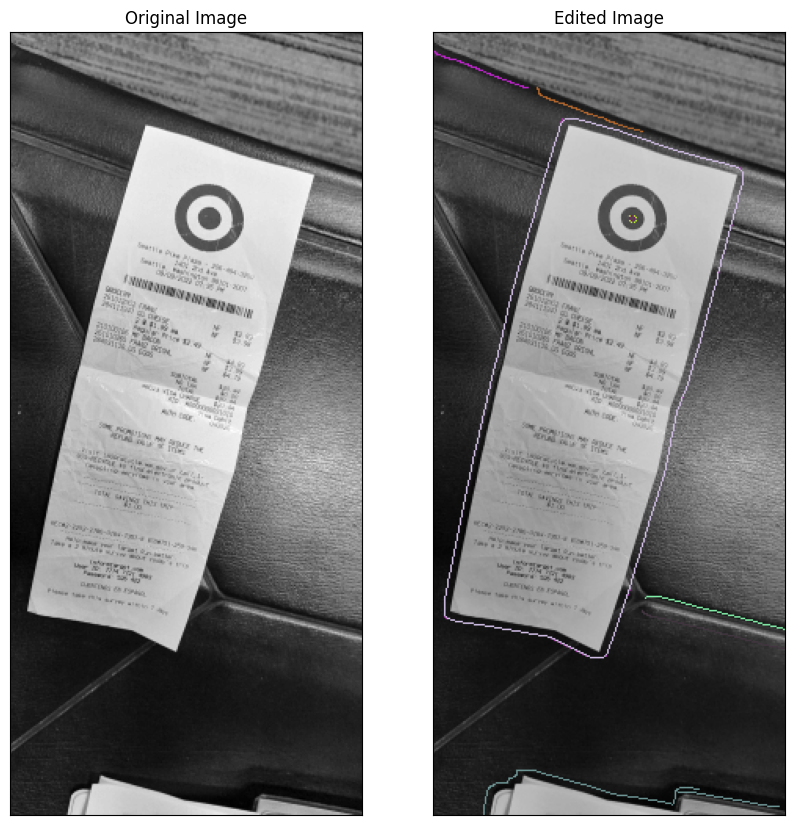

In [35]:
import random

contours, _ = cv.findContours(canny, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

contours = sorted(contours, key=cv.contourArea, reverse=True)

contourImage = cv.cvtColor(img.copy(), cv.COLOR_GRAY2BGR)
for contour in contours:
    cv.drawContours(contourImage, [contour], 0, (random.uniform(0, 255), random.uniform(0, 255), random.uniform(0, 255)))

compareImages(img, contourImage)

In [36]:
candidates = []
for contour in contours:
    peri = cv.arcLength(contour, True)
    approx = cv.approxPolyDP(contour, 0.032 * peri, True)
    if len(approx) == 4:
        candidates.append(approx)


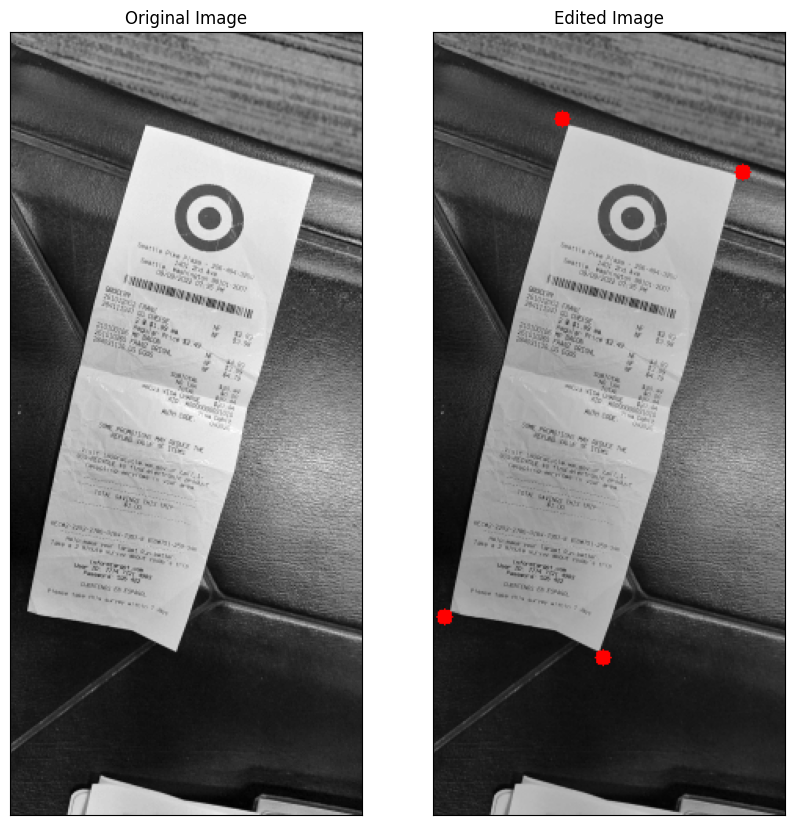

[[[ 82  55]]

 [[  7 373]]

 [[108 399]]

 [[197  89]]]


In [42]:
cornersGray = img.copy()
corners = cv.cvtColor(cornersGray, cv.COLOR_GRAY2BGR)

cv.drawContours(corners, candidates[0], -1, (255, 0, 0), 10)
compareImages(img, corners)

print(candidates[0])

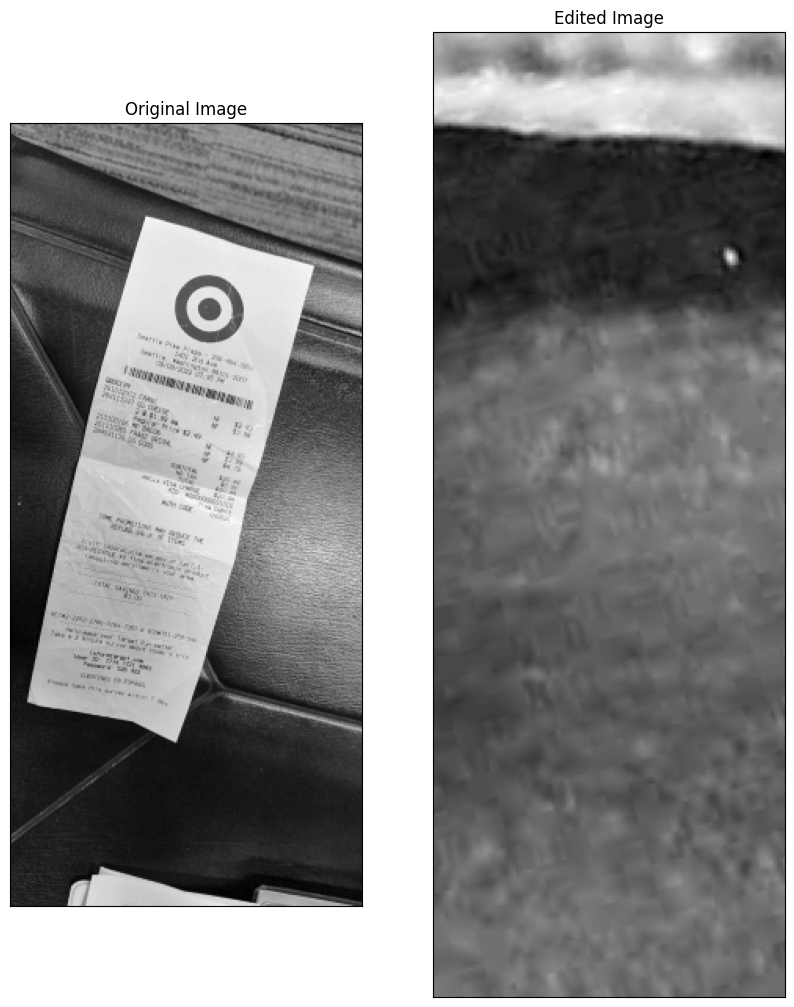

In [39]:
from imutils.perspective import four_point_transform

warped = four_point_transform(original, candidates[0].reshape(4, 2))

compareImages(img, warped)